# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


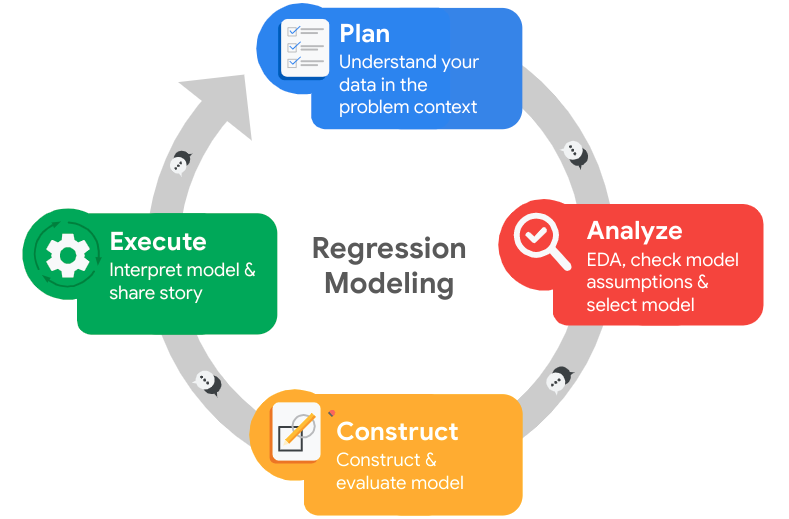

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
tenure|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [47]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns',None)

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.tree import plot_tree

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [48]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("./HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###

df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [6]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [7]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.columns = df0.columns.str.replace(' ', '_').str.lower()
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'time_spend_company':'tenure',
                         'average_montly_hours':'average_monthly_hours'})

# Display all column names after the update
### YOUR CODE HERE ###

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [10]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

Since this data is about employee satisfaction I would not remove any duplicated entries.

In [11]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

`This should be all false negatives. Since the survay was conducted to all the employee of the Salifor Motors. The duplicate entries might be employes who answered the survey exectly the same way.` 

`Dropping the duplicates might bias our data due to misrepresentation and class imbalace.`

In [12]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###

df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
# dropping duplicates ind ata sets
# df0_no_duplicates = df0.drop_duplicates()

df1 = df0

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


`For the duplicates represting multiple employees with same survey answers, perphaps collagues in the company who have simular work history at the company are still unique entrees so I leaving these duplicate out would under represent the population of the dataset. For this reason I will keep all entries and drop zero duplicates` I will make a copy of the original dataset incase we need to reconsider this dicision. It is a dataset about renewable energy and transportation vihicles after all. so `df1 = df0`


### Check outliers

Check for outliers in the data.

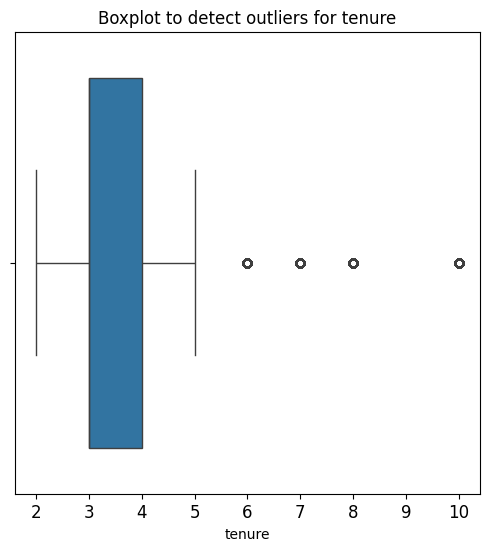

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [15]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75+iqr*1.5
lower_limit = percentile25-iqr*1.5
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure']>upper_limit) | (df1['tenure']<lower_limit)] 
# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 1282


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

#### - What did you observe about the relationships between variables?

#### - What do you observe about the distributions in the data?
#### - What transformations did you make with your data? Why did you chose to make those decisions?
#### - What are some purposes of EDA before constructing a predictive model?
#### - What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
#### - Do you have any ethical considerations in this stage?




#### Reflections 

- I noticed that most employee stayed work for the company between 3 and 4 years. The company has new employee who work there for 1,5 years.
The company has employee who work their for 5,5 years. The companies also has `1282 employees` who work for Salifort Motors over 5,5 years. The outliers on the graphs. The outliers on the boxplot tells us that most outliers are employees who `work their for over 5,5 years`.


- Like mentioned before `For the duplicates represting multiple employees with same survey answers, perphaps collagues in the company who have simular work history at the company are still unique entrees so I leaving these duplicate out would under represent the population of the dataset. For this reason I will keep all entries and drop zero duplicates` I will make a copy of the original dataset incase we need to reconsider this dicision. It is a dataset about renewable energy and transportation vihicles after all. so `df1 = df0`


- Ethical considerations: `Salifort Motors stands for alternative energy vehicle manufacturer`. 
And this motto should be represented throughout the whole company. From manifacturing the products to the processes envovled with the work flow. The business policies and work flow. So this also means that the employees of Salifort Motors should get renewed motivation and renewed energy. There are many ways to accomplish this. for example team building events, salary promotion, additional previllaged,..

Renewable energy is against the massproduction and use and through culture. So to keep the companies enlopyee satisfied and motivated is something Salifort Motors should strive for always.. even if it means that they will make less financial progress. We can not abandon the rules and principles of the foundations of what we build up on in the first place. 

- I hope with my data analysis we will get a clearer idea of what is causing employee to leave the company and what decision we can draw from it. Keeping our employees satisfied and motivated is financially more attractive then to invest in reqruiting and training new employees. How ever I do recommand Salifort Motors to invest in maintaining their employee base. One way is to make sure that they are able to monitor their employee satisfaction rate. Perphas they should hire more management staff to maintain clear and honest communications between different departments of the companies. So they can target employees who are in need of more motivation to stay in the company.

Futher analysis will provide you meaningfull insights where these fields of interest lay in Salifort company. 

#### - Is it the salary? Do long term employe deserve a raise? 

To determine what feature causes what effect the most we will have to build a decision tree to find out what feature explains tenure or leaving the company the most

#### - Is it the work load? Are they working to many (over)hours?

The average working hours seem to be far exceeded. 
There seems to be a strong correlation between overhours and cutomer leaving the company.

#### - Is it the number of projects? 

Around 3 projects per month seem to be most succesfull. More then 4 project causes more over hours and less then 2 leaving elployee workless.

Lets find out.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
df1['left'].value_counts()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [17]:
df1.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


- Correcting type on the data culumn headers

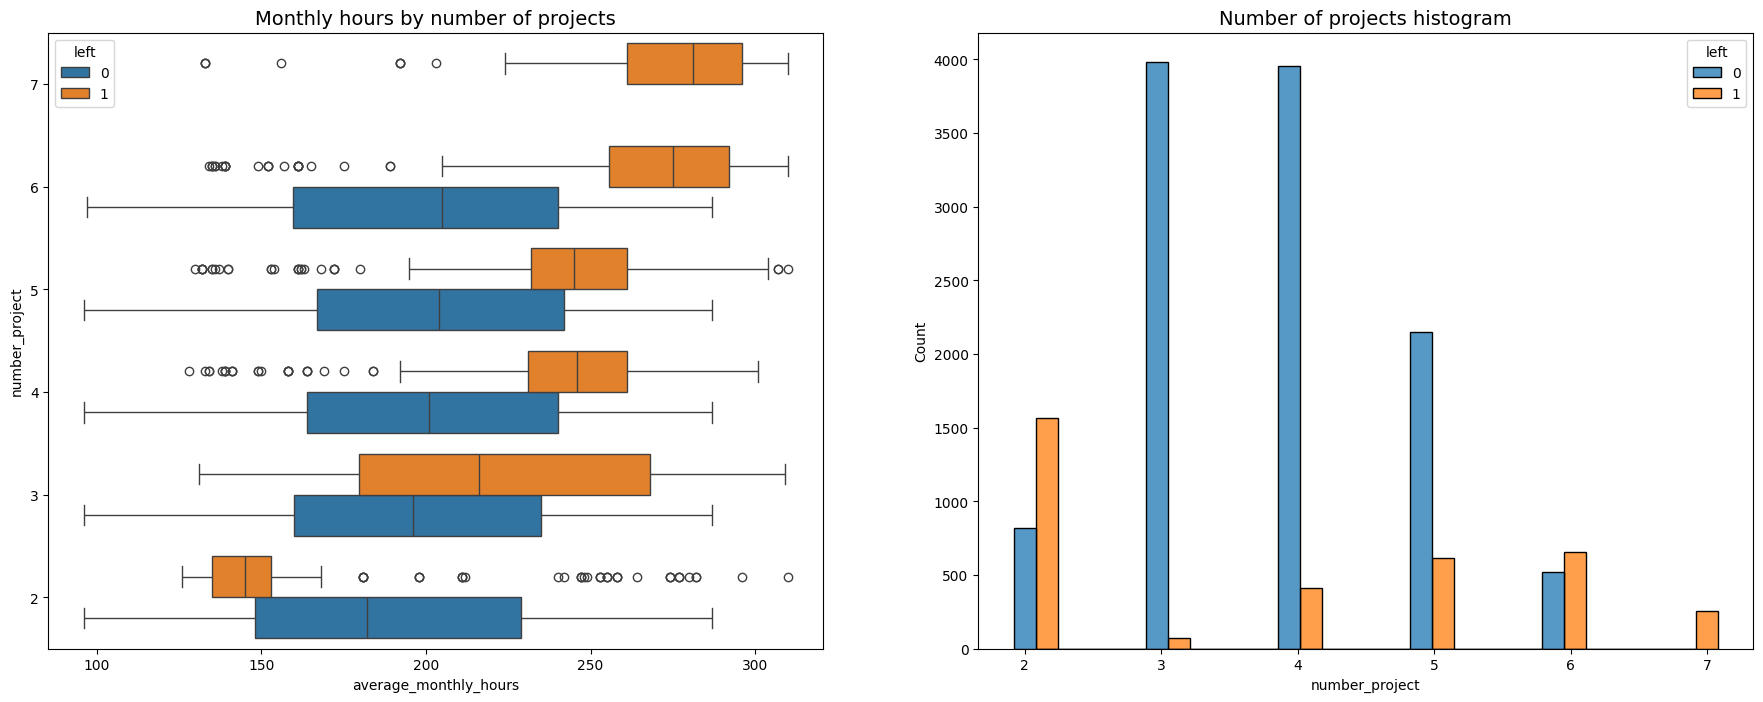

In [18]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

#### From this two graphs we can conclude already two things.

- 1 The average working hours and employee retention is negatively corelated. The more hourse per month the less likely the employe is going to stay. `the employee are overworking`

- 2 We can read that on average `3 projects per month` seems to be idealy to have a well `balanced workload`.
## Conclusion
#### On average 3 projects per month will keep the employee satisfied and the quality of service at bay.

#### There are many observations you could make from this plot.

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255–295 hours/week—much more than any other group.

3. The optimal number of projects for employees to work on seems to be 3–4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this. It seems that employees here are overworked.

As the next step, you could confirm that all employees with seven projects left.

In [19]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()


left
1    256
Name: count, dtype: int64

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

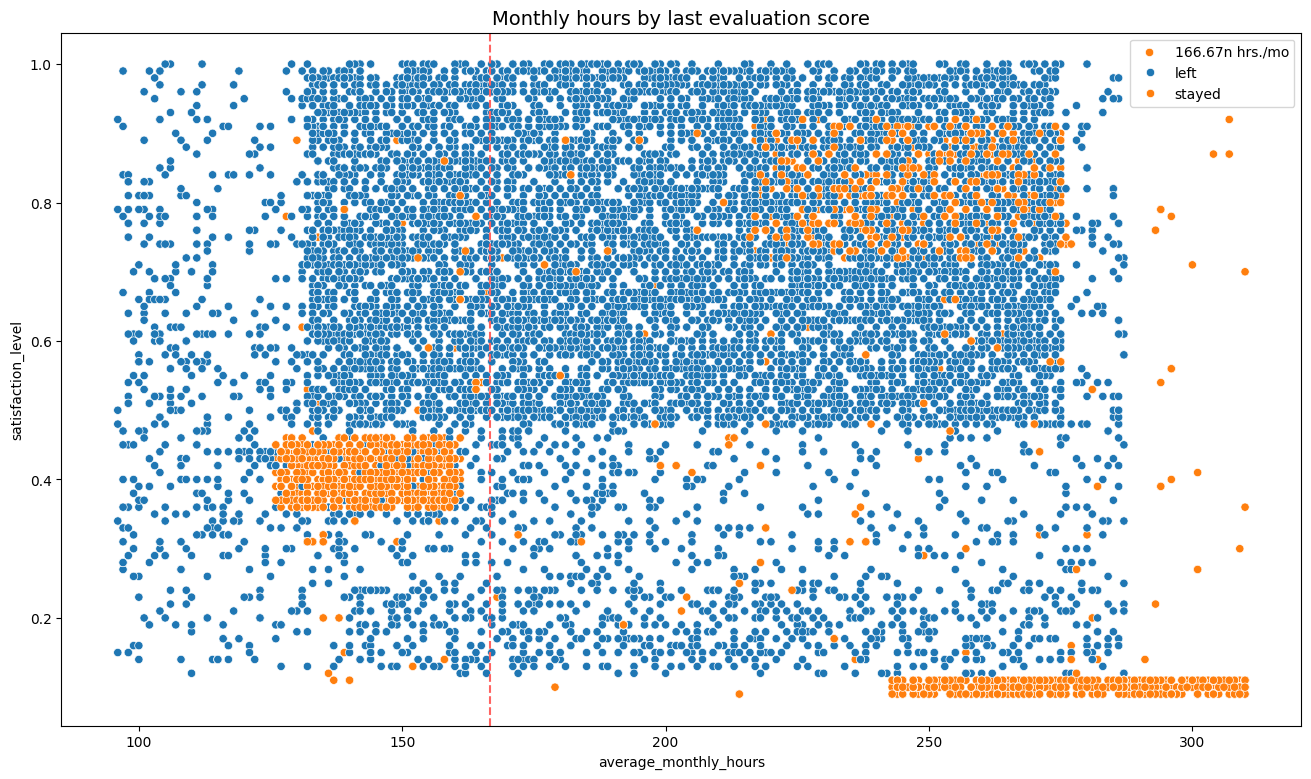

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1,x='average_monthly_hours',y='satisfaction_level',hue='left')
plt.axvline(x=166.67,color='#ff6361',label='166.67hrs./mo',ls='--')
plt.legend(labels=['166.67n hrs./mo','left','stayed'])
plt.title('Monthly hours by last evaluation score',fontsize=14)

The scatterplot above shows that there was a sizeable group of employees who worked `~240–315 hours` per month. `315 hours per month is over 75 hours per week for a whole year`. It's likely this is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more `normal working hours`. Even so, their satisfaction was only around `0.4`. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

Finally, there is a `group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9`.

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data.

## EXTRA!
#### For comparason resons heres a table of workinghours per month and per week 

In [21]:
import pandas as pd

# Sample data for working hours
data = {
    'working_hours_per_month': [160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]
}

# Calculate working hours per week assuming 4.33 weeks per month
data['working_hours_per_week'] = [hours / 4.33 for hours in data['working_hours_per_month']]

# Create DataFrame
df_hours = pd.DataFrame(data)

# Display the DataFrame
print(df_hours)


    working_hours_per_month  working_hours_per_week
0                       160               36.951501
1                       170               39.260970
2                       180               41.570439
3                       190               43.879908
4                       200               46.189376
5                       210               48.498845
6                       220               50.808314
7                       230               53.117783
8                       240               55.427252
9                       250               57.736721
10                      260               60.046189
11                      270               62.355658
12                      280               64.665127
13                      290               66.974596
14                      300               69.284065


This table above is for refrencing 'normal' working hours to compare with Salifort Motors working hours. As you may have noticed the workinghours of Salifort motors are far from regular working hours.

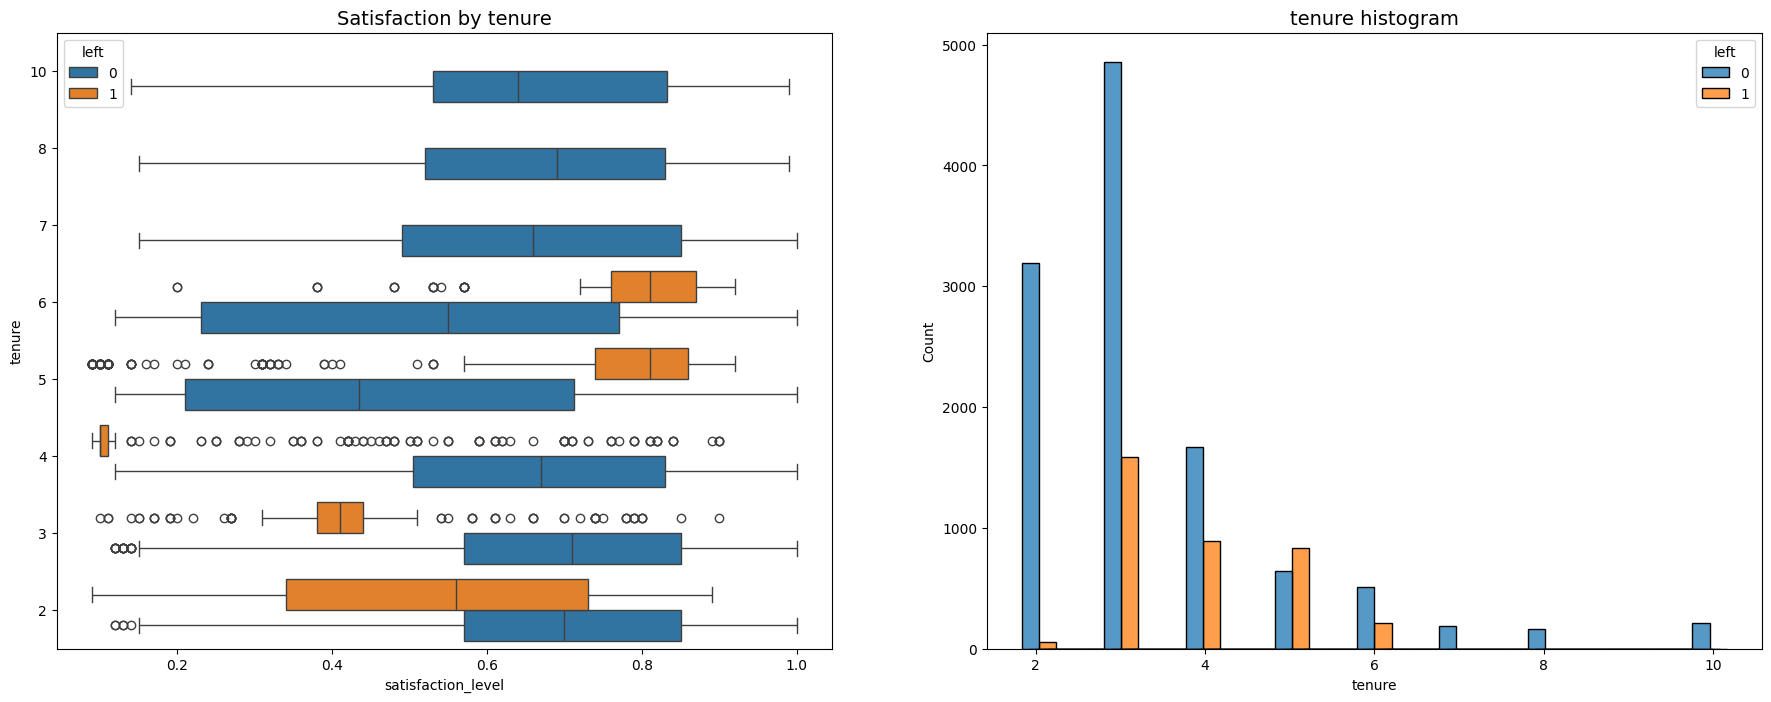

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
fig,ax = plt.subplots(1,2,figsize=(22,8))
sns.boxplot(data=df1,x='satisfaction_level',y='tenure',hue='left',orient='h',ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1,x='tenure',hue='left',multiple='dodge',ax=ax[1],shrink=5)
ax[1].set_title('tenure histogram', fontsize='14')
plt.show()

There are many observations you could make from this plot.
1. Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
2. Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
3. The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
4. The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

As the next step in analyzing the data, you could calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [23]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

/var/folders/12/svhtzgy563jgjbcc27m813xr0000gn/T/ipykernel_4207/1074052523.py:2: FutureWarning: The provided callable <function mean at 0x1224f9b20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])
/var/folders/12/svhtzgy563jgjbcc27m813xr0000gn/T/ipykernel_4207/1074052523.py:2: FutureWarning: The provided callable <function median at 0x122629800> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])


,mean,median
left,,
0,0.666810,0.69
1,0.440098,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

Next, you could examine salary levels for different tenures.

Text(0.5, 1.0, 'Salary histogram by tenure: long-tenure people')

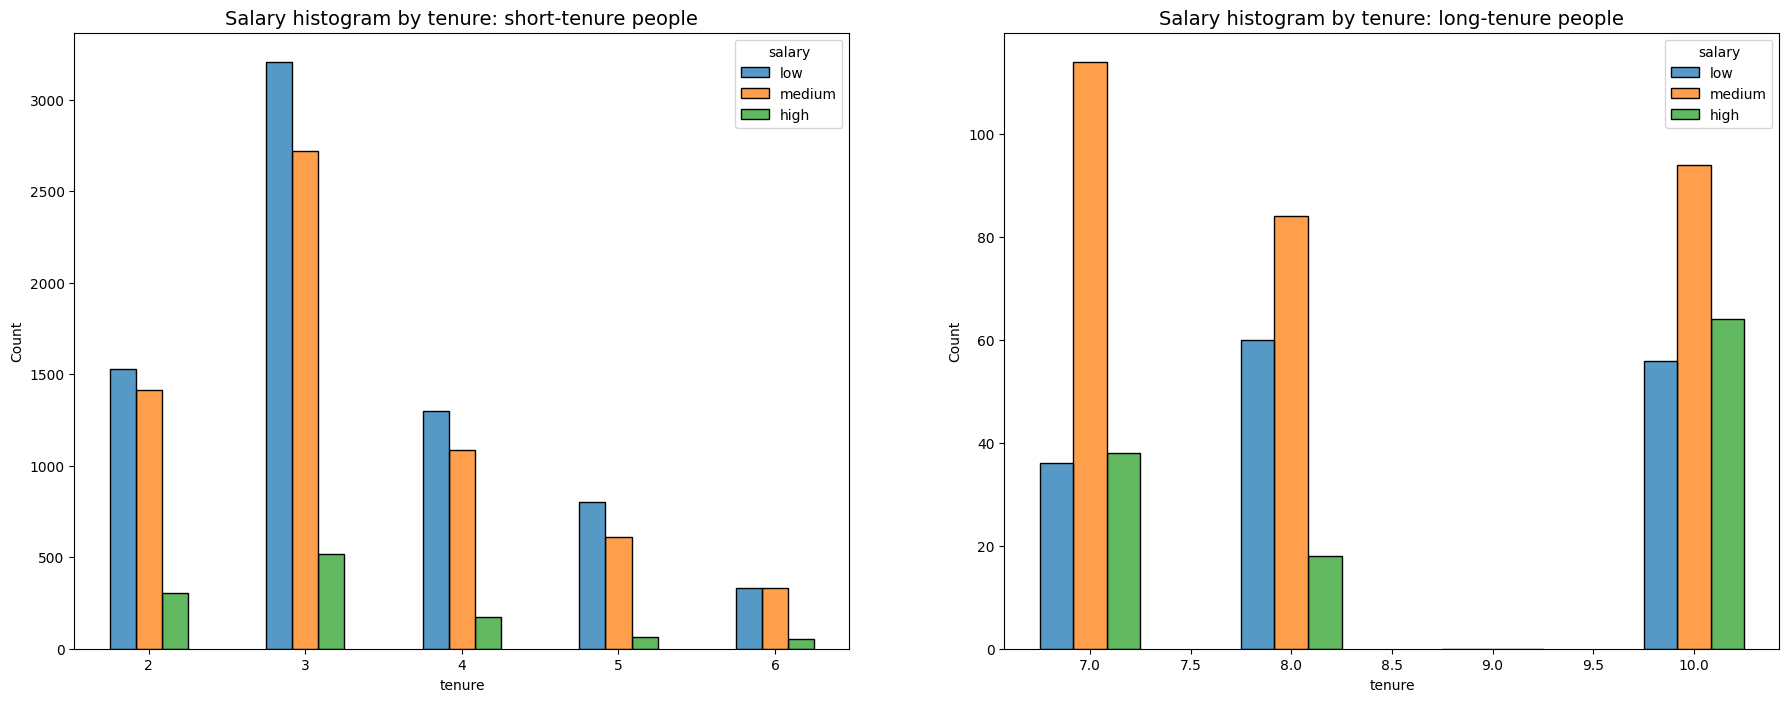

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
fig,ax = plt.subplots(1,2,figsize=(22,8))

# Define short-tenure employees
tenure_short = df1[df1['tenure']<7]

# Define long-tenured employees
tenure_long = df1[df1['tenure']>6]

sns.histplot(data=tenure_short,x='tenure',hue='salary',discrete=1,
            hue_order=['low','medium','high'],multiple='dodge',shrink=0.5,ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenure people', fontsize='14')

sns.histplot(data=tenure_long,x='tenure',hue='salary',discrete=1,
            hue_order=['low','medium','high'],multiple='dodge',shrink=0.5,ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenure people', fontsize='14')


The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

Next, you could explore whether there's a correlation between working long hours and receiving high evaluation scores. You could create a scatterplot of average_monthly_hours versus last_evaluation.

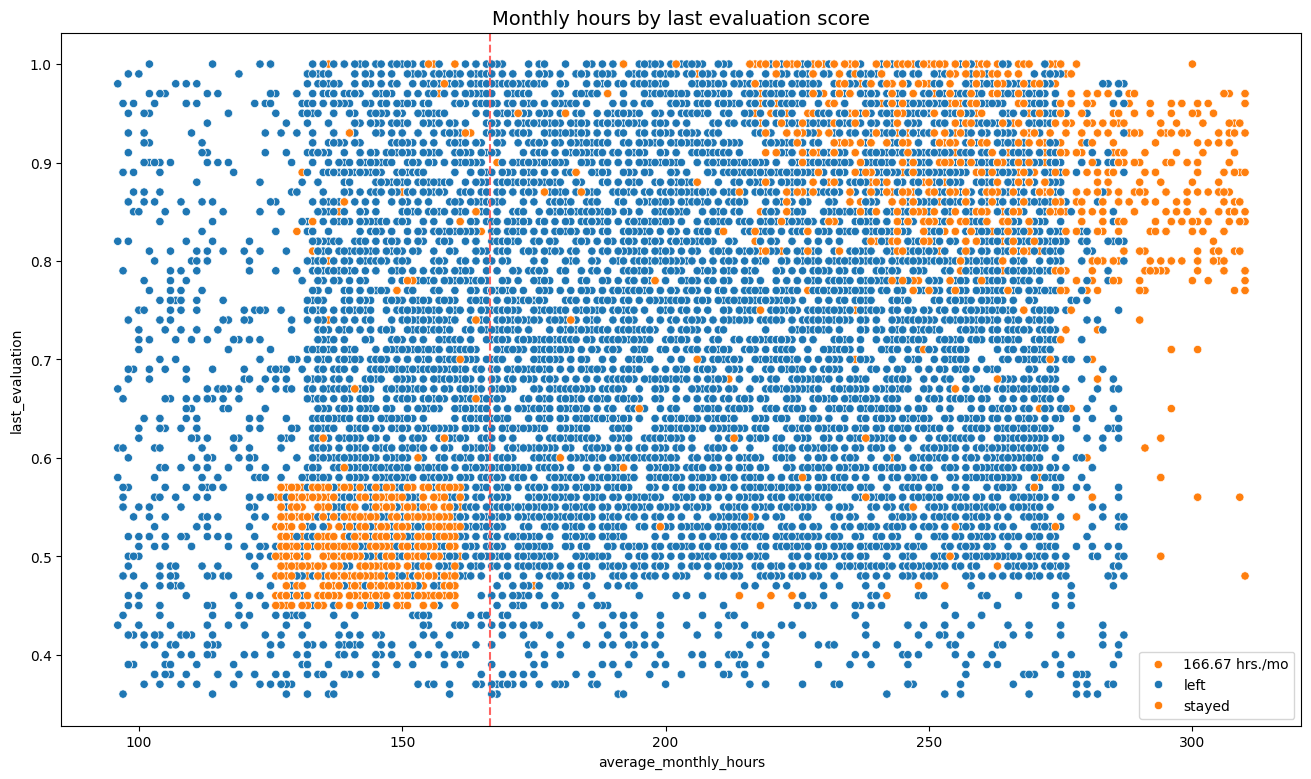

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1,x='average_monthly_hours',y='last_evaluation',hue='left')
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo','left','stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');
plt.show()

The following observations can be made from the scatterplot above:
1. The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.
2. There seems to be a correlation between hours worked and evaluation score.
3. There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
4. Most of the employees in this company work well over 167 hours per month.

Next, you could examine whether employees who worked very long hours were promoted in the last five years.

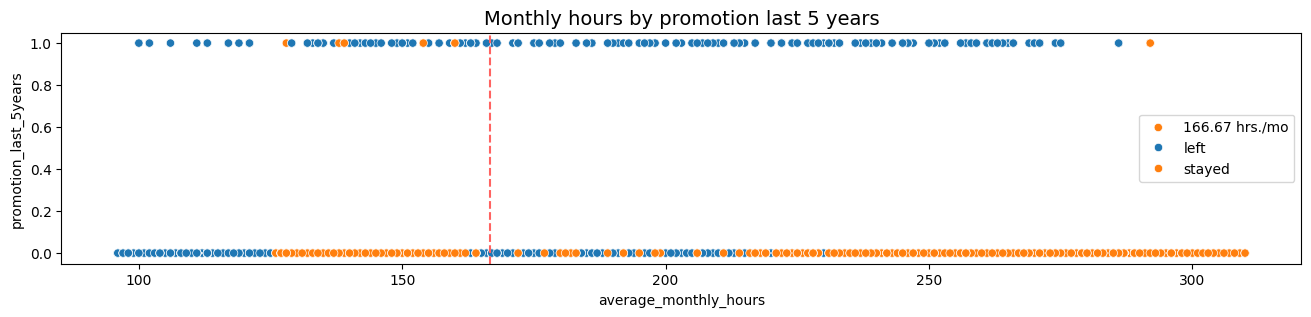

In [26]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16,3))
sns.scatterplot(data=df1,x='average_monthly_hours',y='promotion_last_5years',hue='left')
plt.axvline(x=166.67,color='#ff6361',ls='--')
plt.legend(labels=['166.67 hrs./mo','left','stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours



In [27]:
# Create a plot as needed
### YOUR CODE HERE ###
df1['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 45

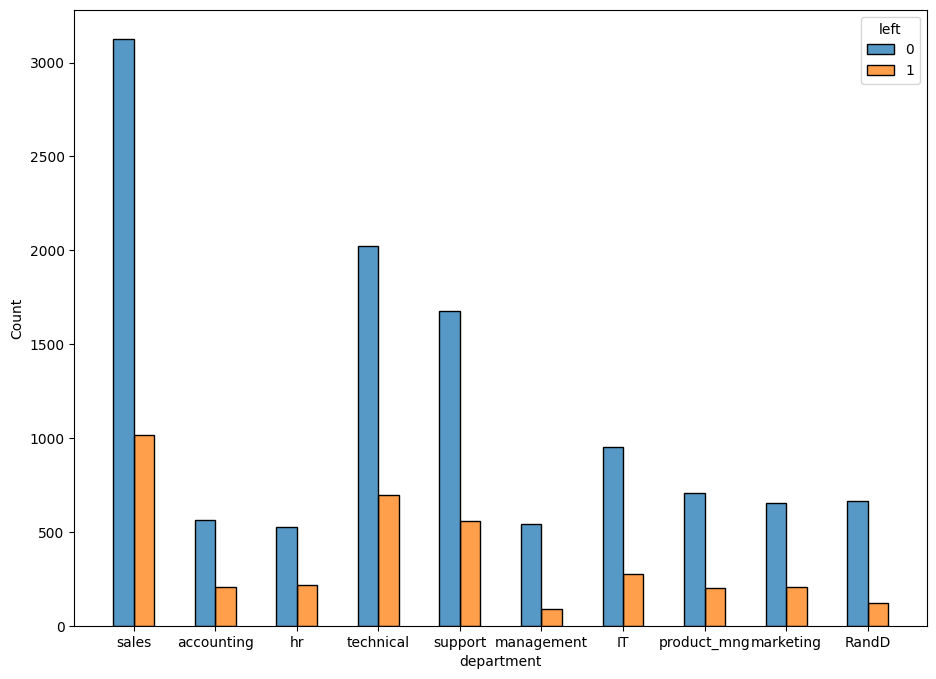

In [28]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1,x='department',hue='left',discrete=1,
            hue_order=[0,1],shrink=0.5,multiple='dodge')
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

## This plot show us that it's personel retention is not related to department of the company.

In [29]:
# Plot a correlation heatmap
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df0.corr(),vmin=-1,vmax=1,annot=True,cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

ValueError: could not convert string to float: 'sales'

<Figure size 1600x900 with 0 Axes>

`The correlation heatmap confirms` that the `number of projects`, `monthly working hours`, and `evaluation scores` all have some correlation with each other, and employee `tenure` is positively correlated with their `satisfaction level`.`

Next, you could inspect how the employees who left are distributed across departments.

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

- The employee of salifort motors are over working
- Overhours seem to be part of the working culture at Salifort Motors
- This could be due to over load on projects as the features seem to be negetively corelated and thus resulting in employee leaving the company..

`The workload seems not balanced well, some employee have to less work causing to leave the company, others are working to many overhours causing to leave the company as well. I can almost relate to how engines of motorised vihecles go high in revs when they try to accelirate quickly. And shifting gears..`

Overal it is not a healthy working culture. It can even relate to overclocking resulting in burnouts if not adressed accordingly.

To answer the question if this is aligned with a perticle department inside the company and this is negative.

The employe churn is not related to just one department. Within each department the employee seem to be perportioned. Almost as if the employee churn within each department of the company is as energy waste. We can strive to lessen energy wastage. in anacron to engines (reduce heathloss or reduce waste of thermal energy).

The employee churn is devided among all departments of the company fairly equal.

- `My recommandation is to work on a better work-life balance than to recruit for replacement personal as this is more eco friendly and cost effective. So the alternative of outsourcing for replacement parts of the business organisation. I do advise professionals to analyse business policies regualrly. For example outside business analyst and data scientist. Marketing profesionals and team building experts.`

## I will proceed my analysis after the weekend. To let this research ventilate.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?

`The employee leaving the company all had much more overhours than normal 38-40 hour weeks. They also had relatively more projects per month. 4-5 projects.

There was also a group who only had a few projects per month with less then average monthly working hours.`

`This phenomina is described in more details above.`

- Which independent variables did you choose for the model and why?
`I chose satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure'
to determine what caused a employee to leave or stay.`

- Are each of the assumptions met?

`To be answered after the model is build.`

- How well does your model fit the data?

- Can you improve it? Is there anything you would change about the model?

- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

`Binairy classification task: Weather or not a employee at Salifort Motors is going to stay or leave the company.`


### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

`A logistic regression model`
🔎
#### Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





### Modeling

Add as many cells as you need to conduct the modeling process.

# Restart Lab from here first make sure the `tenure` and `tenure` columns are merged to one ..

#### Then start analyzing this first model and try to build another model..

# The evaluate and re organize the lab to present te stakeholders and other audience..

#### Modeling Approach A: Logistic Regression Model

This approach covers implementation of Logistic Regression.

Logistic regression
Note that binomial logistic regression suits the task because it involves binary classification.

Before splitting the data, `encode the non-numeric variables`. `There are two: department and salary.`

department is a categorical variable, which means you can dummy it for modeling.

salary is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0–2.

In [ ]:
### YOUR CODE HERE ###
# Copy the dataframe
df_enc = df1.copy()

df_enc['salary'] = (df_enc['salary'].astype('category')
                   .cat.set_categories(['low','medium','high'])
                   .cat.codes)
# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc,drop_first=False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


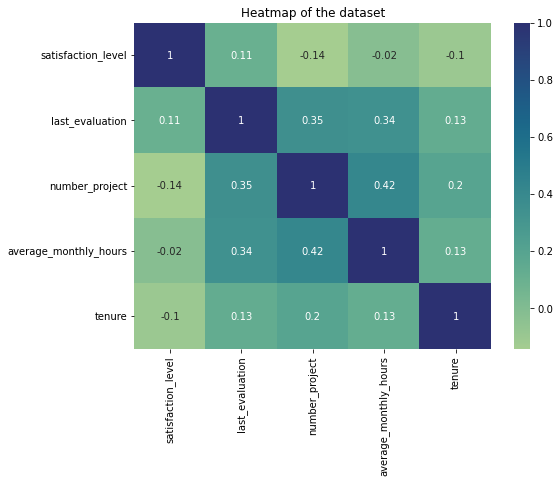

In [ ]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8,6))
sns.heatmap(df_enc[['satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure']]
           .corr(),annot=True,cmap='crest')
plt.title('Heatmap of the dataset')
plt.show()

Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't.

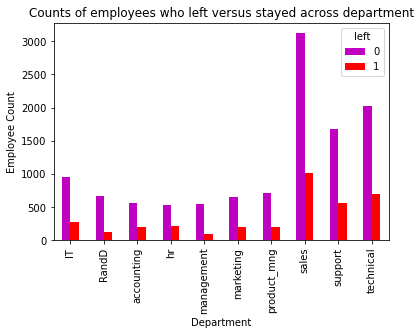

In [ ]:
pd.crosstab(df1['department'],df1['left']).plot(kind='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee Count')
plt.xlabel('Department')
plt.show()

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the tenure column that were identified earlier.

In [ ]:
df_logreg = df_enc[(df_enc['tenure']>=lower_limit)&(df_enc['tenure']<=upper_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
y = df_logreg['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [ ]:
X = df_logreg.drop('left',axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42,max_iter=500).fit(X_train,y_train)

In [ ]:
y_pred = log_clf.predict(X_test)

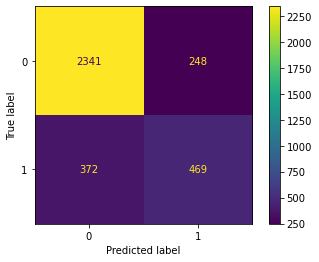

In [ ]:
# Compute values for confusion matrix
log_cm  = confusion_matrix(y_test,y_pred,labels = log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,display_labels=log_clf.classes_)

log_disp.plot(values_format='')

plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

- Check the class balance in the data. In other words, check the value counts in the left column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

- Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.


In [ ]:
df_logreg['left'].value_counts(normalize=True)

0    0.754903
1    0.245097
Name: left, dtype: float64

There is an approximately 76%-24% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, you might want to resample the data to make it more balanced. In this case, you can use this data without modifying the class balance and continue evaluating the model.

In [ ]:
# Create classification report for logistic regression model
target_names = ['predicted would not leave','Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

predicted would not leave       0.86      0.90      0.88      2589
    Predicted would leave       0.65      0.56      0.60       841

                 accuracy                           0.82      3430
                macro avg       0.76      0.73      0.74      3430
             weighted avg       0.81      0.82      0.81      3430



The classification report above shows the performance of a logistic regression model in predicting whether a customer will leave the company. Here are the key metrics:

Precision: 0.86  for predicting customers who would not leave and 0.65 for those who would leave.

Recall: 0.90 for predicting customers who would not leave and 0.56 for those who would leave.

F1-Score: 0.88 for predicting customers who would not leave and 0.60 for those who would leave.

Support: 2589 for predicting customers who would not leave and 841 for those who would leave.

#### Overall accuracy: 82%

#### Macro average: Precision: 0.76, Recall: 0.73, F1-Score: 0.74

#### Weighted average: Precision: 0.81, Recall: 0.82, F1-Score: 0.81

While the model achieves an overall accuracy of 82%, it performs significantly better at predicting customers who will not leave (with higher precision and recall) compared to those who will leave. This disparity suggests that the model is better at identifying customers who stay rather than those who leave.

# Model 2

#### Building a Decision tree classifier model

#### Decision tree
Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [ ]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [ ]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree
Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [ ]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4,6,8,None],
            'min_samples_leaf':[2,5,1],
            'min_samples_split':[2,4,6]}

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy': 'accuracy','precision': 'precision','recall':'recall','f1':'f1','roc_auc':'roc_auc'}

tree1 = GridSearchCV(tree,cv_params,scoring,cv=4,refit='roc_auc')

In [ ]:
%%time
tree1.fit(X_train,y_train)

CPU times: user 3.06 s, sys: 373 ms, total: 3.44 s
Wall time: 3.43 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [ ]:
tree1.best_params_

{'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [ ]:
tree1.best_score_

0.9811399942559518

In [ ]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

In [ ]:
tree1_results_cv = make_results('decision tree cv',tree1,'auc')
tree1_results_cv

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.96232,0.930913,0.946284,0.974842,0.98114


All of these scores from the decision tree model are strong indicators of good model performance.

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. You could construct a random forest model next.

#### Compute the decision tree for tree1 classifier

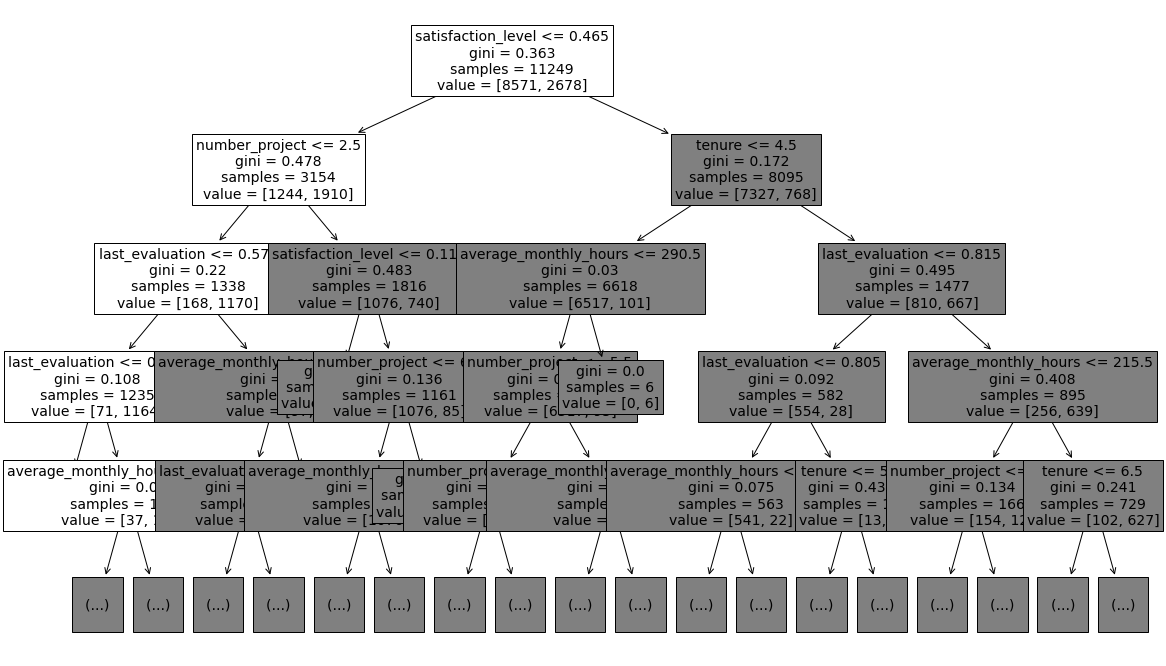

In [ ]:
# Compute the decision tree
### YOUR CODE HERE ###

plt.figure(figsize=(20,12))
plot_tree(tree1.best_estimator_, max_depth=4, fontsize=14, feature_names=X.columns);

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



In [ ]:
print(tree1_results_cv)

              model  precision    recall        F1  accuracy      auc
0  decision tree cv    0.96232  0.930913  0.946284  0.974842  0.98114


✏
## Evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.


# Decision Tree Model Results

## Performance Metrics:

- **Precision**: 0.96232
  - This means that when the decision tree model predicts a positive class (e.g., a customer will leave), it is correct 96.23% of the time. High precision indicates a low false positive rate.

- **Recall**: 0.930913
  - This indicates that the model correctly identifies 93.09% of the actual positive cases. High recall means the model misses fewer positive instances, indicating a low false negative rate.

- **F1-Score**: 0.946284
  - The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both. An F1-score of 0.946284 indicates a very good balance between precision and recall, suggesting the model performs well overall in classifying the positive class.

- **Accuracy**: 0.974842
  - The model correctly classifies 97.48% of all instances. High accuracy implies that the model makes few errors overall, but it's important to consider this metric in the context of class distribution to ensure it’s not skewed by class imbalance.

- **AUC (Area Under the ROC Curve)**: 0.98114
  - AUC measures the model's ability to distinguish between positive and negative classes. An AUC of 0.98114 indicates excellent performance, with the model having a high probability of correctly ranking a randomly chosen positive instance higher than a randomly chosen negative instance.

## Summary

The decision tree model shows excellent performance across all key metrics:
- **Precision** (96.23%) and **Recall** (93.09%) are both high, indicating that the model is effective at correctly identifying positive cases while maintaining a low false positive rate.
- **F1-Score** (94.63%) reflects a strong balance between precision and recall.
- **Accuracy** (97.48%) indicates that the model makes very few classification errors overall.
- **AUC** (98.11%) demonstrates the model’s superior ability to distinguish between the positive and negative classes.

Overall, these metrics suggest that the decision tree model is highly effective in this context, providing reliable and accurate predictions.


💭
### Reflect on these questions as you complete the executing stage.

- ####  What key insights emerged from your model(s)?

We build the decision tree and a logistic regression model earlier. (in the same lab so the naming conventions for example because of the train and test splits we can not reverted meaning the lab can only be read ordinal) with that said: 
When we compare the Logistic regression model and the decision tree. 
The champion model is clearly the decision tree. This is also what we expected. Here is again a brief summary of the models reseults;

- Precision (96.23%) and Recall (93.09%) are both high, indicating that the model is effective at correctly identifying positive cases while maintaining a low false positive rate.
- F1-Score (94.63%) reflects a strong balance between precision and recall.
- Accuracy (97.48%) indicates that the model makes very few classification errors overall.
- AUC (98.11%) demonstrates the model’s superior ability to distinguish between the positive and negative classes.


`Knowing this we can conclude that the most effective varablies are to be read in the deicision tree nodes`


- #### What business recommendations do you propose based on the models built?

- From the decision tree we can read from the decision nodes that the employees satisfaction rate, from their last evaluation, that the number of projects and the overhours are the most explainable reasons for employee churn. Knowing this we can simply find ways to balance the workload, the number of projects, towards all employees. 



- #### What potential recommendations would you make to your manager/company?
- There might be qualification issues abong the professional capabilities for the employee. So The company might have to invest in the education of their employe to be capable to perform som qualification tasks.

- #### Do you think your model could be improved? Why or why not? How?

- The model is fairly accurate, ofcourse with more data like regual evaluation servey we can smoothly monitor employee satisfaction rate and find underlying sortages and overqualifications.

- #### Given what you know about the data and the models you were using, what other questions could you address for the team?

- The results are based on one decision tree, if the company wants more accuracy we can build a random forrest to improve model accuracy, to better monitor comany performances. So more models to build to improve accuracy, precision, recall, and f1 score.

### From more accurate results we can take more accurate actions and business decisions.

- #### What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

Context reseach google.com, personal experiences, passed lab exercises,
github, kaggle,.. 


- #### Do you have any ethical considerations in this stage?

I would recommand the company to transition into a more health work-life balanced. The overall employee satisfaction level is a very important indicater of comapany's health.

### Summary of model results

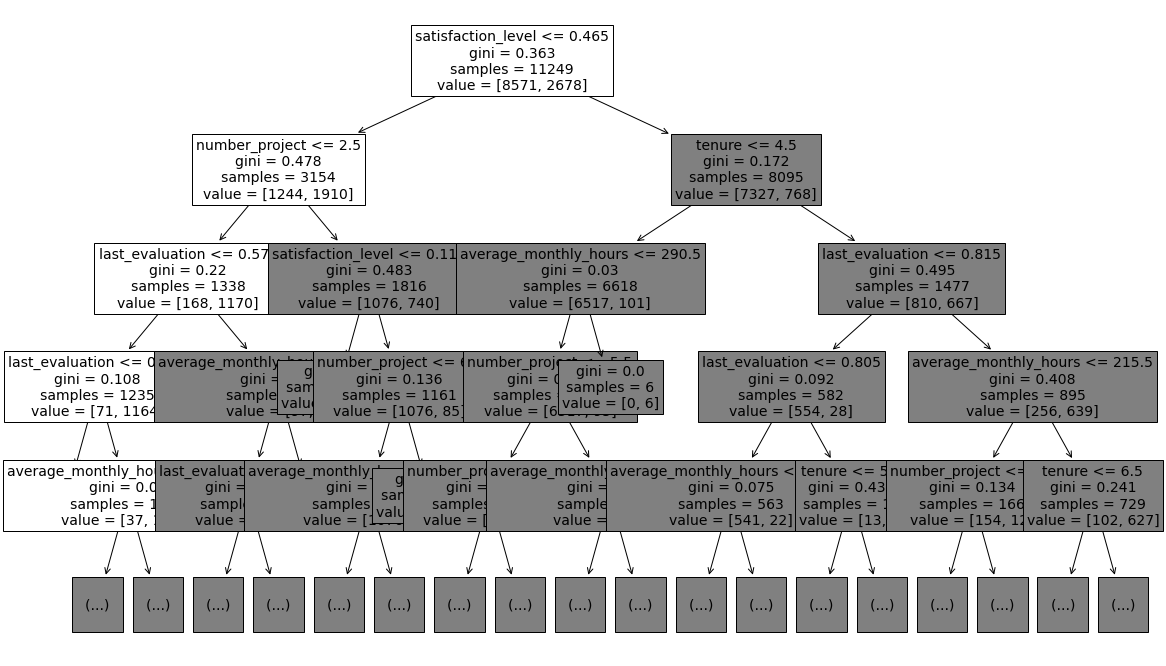

In [ ]:
# Compute the decision tree
### YOUR CODE HERE ###

plt.figure(figsize=(20,12))
plot_tree(tree1.best_estimator_, max_depth=4, fontsize=14, feature_names=X.columns);

### Conclusion, Recommendations, Next Steps


I would strongly recommand to invest in employee satisfaction as it is more cost effective to keep employee happy than to constantly recruit new employees. 

I would also recommand to closly monitor employee satisfaction and act upon their needs. Maybe I would recommand to invest in business analysts and data scientists working inside the company to help you gain meaningfull data driven insights.



**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.